<div class="title">Regression and Classification Basics: Case Studies</div>
<div class="subtitle">Máster en Big Data y Data Science</div>
<div class="author">Profesor: Carlos María Alaíz Gudín &mdash; Universidad Autónoma de Madrid</div>

---

**Configuration**

This cell defines the general configuration of Jupyter Notebook.

In [ ]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

This cell imports the packages to be used.

In [ ]:
# Standard packages.
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Initialisations.
matplotlib.rc("figure", figsize=(15, 5))
seed = 123

# Regression and Classification Case Studies

## Introduction

The objective of this assignment is to study two very simple Machine Learning problems: a regression task and a classification one.

The notebook is structured in several exercises specifying the different tasks.

## Regression Case Study

### Dataset

A regression dataset is synthetically generated.
The underlying model is linear with respect to some informative features, although the relation is masked by the noise.

In [ ]:
x, y = make_regression(
    n_samples=500, n_features=20, n_informative=5, noise=5e1, random_state=seed
)

<div class="qst">

* Divide the dataset into a training ($70\%$) and a test ($30\%$) partitions.

<div class="notes">

* The *scikit-learn* method `train_test_split` allows to split a dataset.

</div>
</div>

Primero, observaremos los datos.

In [ ]:
# Show the data set.
print(f"x dataset :")
print(x[:5])
print()
print(f"y dataset :")
print(y[:5])

x dataset :
[[-0.69953895  2.03206204 -0.22750115  0.17055848  0.23056674 -0.66900599
   0.26980925 -0.27220882  1.08388641  0.40919525 -0.70117907  1.65920738
   0.61413968 -0.51165012 -1.46038706 -0.44334041  0.4455109  -0.06607722
  -0.63438941 -3.20140396]
 [ 0.78748777  0.49755381 -0.41294531  1.40050745  1.1114672   0.21255131
   1.22895651  0.44843174 -0.89188709  1.44900529  0.93186596  1.18922791
   0.8867356  -0.59000141 -0.17666249  0.60487124 -0.8685011  -0.48477898
   1.0597274  -1.45293577]
 [-1.46947029  1.64079711 -0.50490279  0.09425929 -0.52132589 -0.16575947
   1.57107028 -1.88021757 -1.36228816  0.23350081 -2.04552033  2.39307931
  -0.59260753 -1.513273   -2.03027105 -0.13684291  1.43295266  1.1909001
   0.79280906 -1.69924121]
 [-0.44414206  0.70633284 -1.53906585 -0.32967681  0.32125428 -0.95547137
   0.55350384  0.466579    1.68987953 -0.01982524 -0.80244607 -0.33432531
  -0.04695795 -0.26239857 -0.46134446  0.43073018 -1.39380664 -0.52348153
  -0.27733156 -0.013

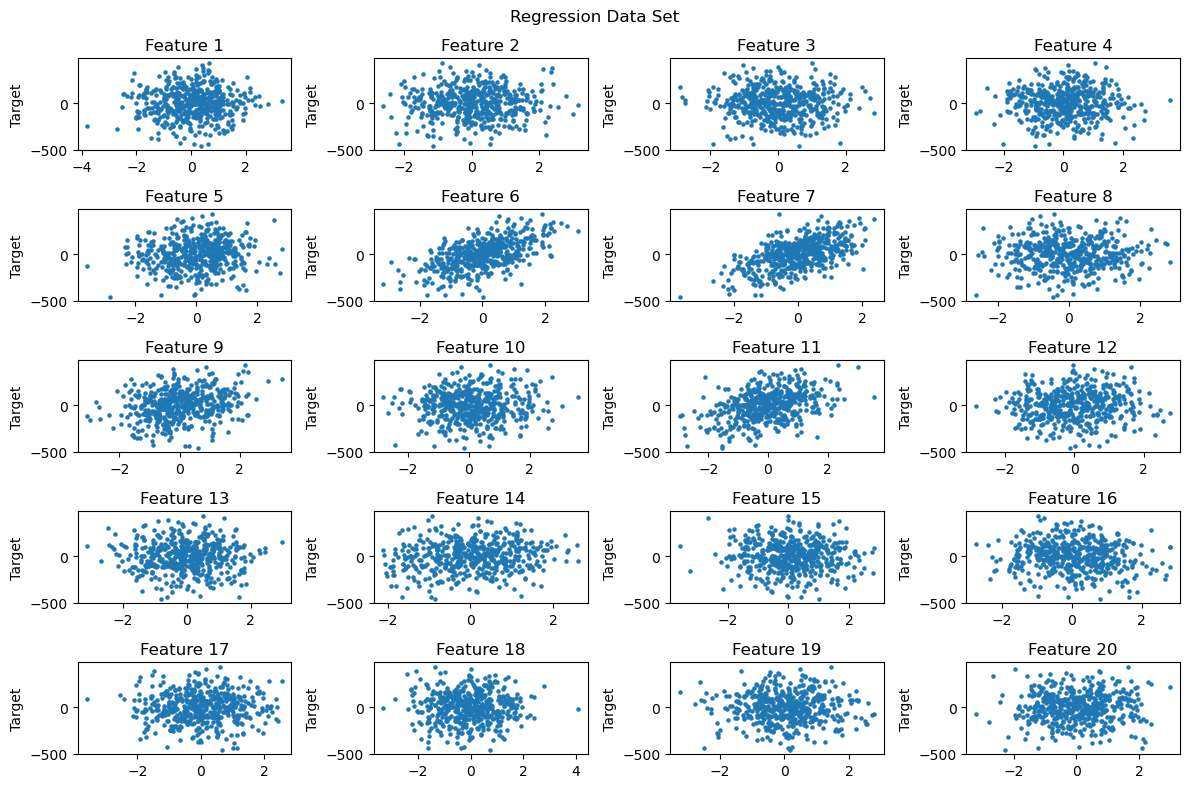

In [ ]:
# Plot the data with subplots.
fig, ax = plt.subplots(5, 4, figsize=(12, 8))
for i in range(5):
    for j in range(4):
        ax[i, j].scatter(x[:, 4 * i + j], y, s=5)
        ax[i, j].set_title(f"Feature {4 * i + j + 1}")
        ax[i, j].set_ylabel("Target")
# Set labels and title.
fig.suptitle("Regression Data Set")
plt.tight_layout()
plt.show()

Luego dividiremos el conjunto de datos en una partición de train (70%) y otra de test (30%).

In [ ]:
################################################################################
# Insert code.
# Divide the dataset into training (70%) and testing (30%) sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

print(f"Training set x : {x_train.shape[0]} samples")
print(f"Testing set x  : {x_test.shape[0]} samples")
print(f"Traning set y  : {y_train.shape[0]} samples")
print(f"Testing set y  : {y_test.shape[0]} samples")
print()

# Show the x_train and y_train.
print("x_train :")
print(x_train[:5])
print()
print("y_train :")
print(y_train[:5])
print()

# Show the x_test and y_test.
print("x_test :")
print(x_test[:5])
print()
print("y_test :")
print(y_test[:5])


################################################################################

Training set x : 350 samples
Testing set x  : 150 samples
Traning set y  : 350 samples
Testing set y  : 150 samples

x_train :
[[ 1.54622601 -1.44527383 -1.71442628  0.94199439 -1.2940804   0.09878647
  -1.0207166  -0.5098842   0.71334924 -2.27687712  0.55572447  0.32185471
   0.4267067   0.77154762  0.65508192  0.71449155 -0.0789156  -0.51731268
  -1.39961663  0.81026733]
 [ 0.87496233  1.64881786  1.22007851  0.57779395 -0.41634529 -1.27174695
   0.74712841  1.62912121 -0.67982789 -1.48195846 -0.00890283 -0.23431872
   0.35227158 -0.60501266 -1.6044364   1.71546859  0.03816631  1.64218277
   0.6283201  -0.16974382]
 [ 1.44424506 -0.44850157  0.08618543  1.06925344 -0.65399055 -0.46144686
  -1.52756927 -0.61983203  1.06167883  1.13579066 -0.46482773  1.88454748
  -1.57782779 -1.37394716  2.17205091 -0.09358918  0.02688627  0.94255342
   1.64960973 -0.78721079]
 [-2.18708593 -0.43967221  0.21458607 -0.73626393 -0.40215974  1.52544424
  -0.92009311 -0.15860521 -0.62402485 -1.1742703  -0

---

### Analysis

As a preliminary analysis of the data, the correlation between each feature and the target can give some information about how (linearly) informative that feature is.

<div class="qst">

* Compute the correlation between each feature and the target, considering only the training partition.
* Represent the correlation of each feature using a bar plot.
  According to the plot, which ones seem to be more informative?

<div class="notes">

* The NumPy method `corrcoef` can be used to compute the correlation coefficient.

</div>
</div>

Calculamos la correlación entre cada característica (feature) y la variable objetivo (target), considerando solo la partición de entrenamiento.

In [ ]:
################################################################################
# Insert code.
# Compute the correlation between the features and the target in the training set with corrcoef.
correlation = np.corrcoef(x_train, y_train, rowvar=False)
print("The correlation between the features and the target for x_train and y_train :")
print(correlation)
print()

# The last row of the correlation matrix contains the correlations with the target
feature_target_corr = correlation[:-1, -1]
print("The last row of the correlation between the features and the target for x_train and y_train :")
print(feature_target_corr)
print()

# Display the correlations (sorted in descending order)
print("Feature-Target Correlations:")
for i, corr in enumerate(feature_target_corr):
    print(f"Feature {i+1}: {corr:.4f}")

################################################################################

The correlation between the features and the target for x_train and y_train :
[[ 1.00000000e+00 -4.47768125e-02 -4.49457323e-03  4.97495255e-02
   3.40604771e-02  3.74669160e-02 -8.37149798e-03 -7.14944518e-02
   5.12843753e-02 -2.44929246e-02  4.77601250e-02 -3.91071565e-02
   3.75822417e-02  1.68587918e-02  2.34323195e-02 -3.88107928e-02
   4.30212154e-04  4.49360806e-02  9.00500919e-02  1.99729859e-02
   5.18128516e-02]
 [-4.47768125e-02  1.00000000e+00  1.37200440e-01 -5.19858264e-02
   3.54637694e-03  2.50539127e-03  7.90871499e-02  1.23126789e-01
  -4.40501861e-02 -2.39473352e-02  4.91202521e-02  1.83871191e-02
  -8.46981707e-02  6.01559033e-04 -1.17676059e-02  1.07023252e-01
   3.73295340e-02  4.61045350e-02  1.50543159e-01  2.77472065e-02
   4.31168628e-02]
 [-4.49457323e-03  1.37200440e-01  1.00000000e+00 -7.14679172e-02
  -3.53984556e-02 -7.25963239e-02 -4.27063298e-02  1.32593663e-02
   4.23175193e-03 -4.95740475e-02  4.12746822e-02 -6.53461206e-02
   6.71738158e-02  6.45638

Luego, representamos la correlación de cada característica mediante un diagrama de barras.

Al observar el gráfico, podemos ver que cuanto más se acerquen los valores a 1, mayor será la correlación.

En este caso, las features 6, 7, 9 y 11 son las más informativas. Esto se debe a que presentan correlaciones con la variable target de 0.6, 0.5, 0.3 y 0.4, respectivamente, que son valores más altos que las demás features.

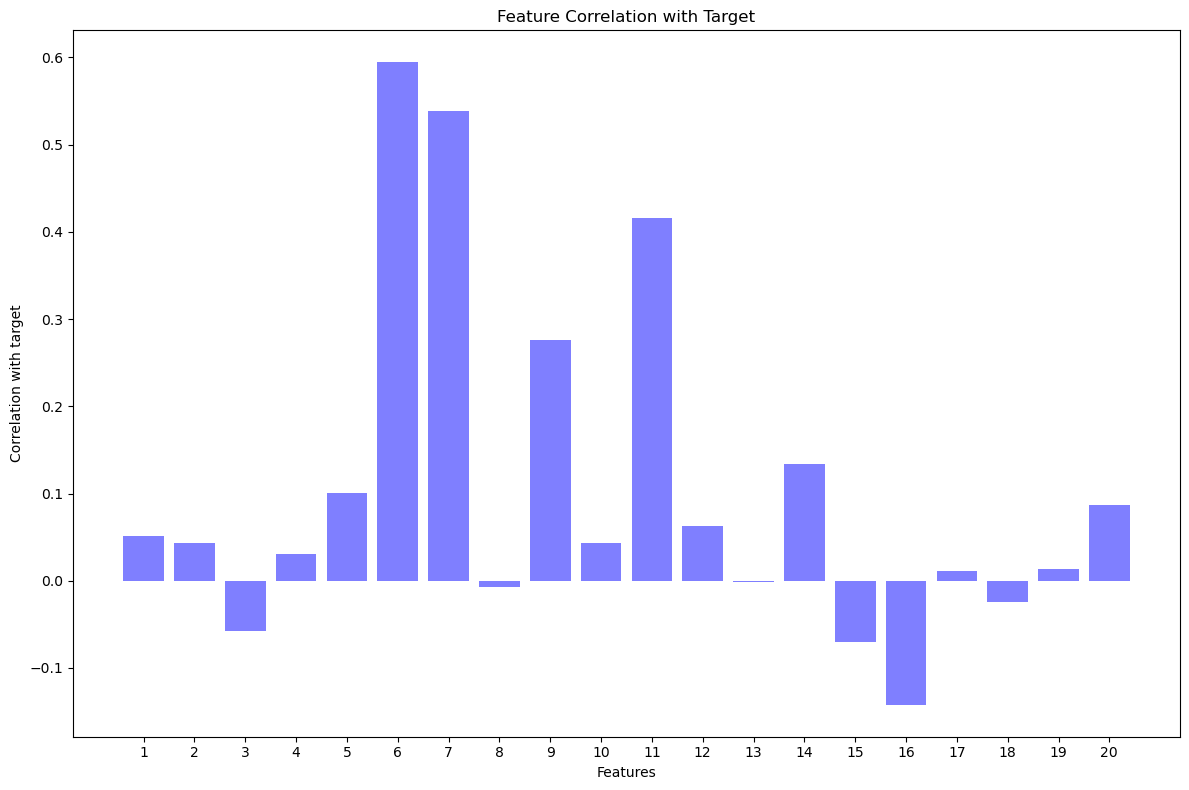

In [ ]:
# Use bar plot to display the correlations of each feature with the target
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the bar chart on the created axis (ax)
ax.bar(range(len(feature_target_corr)), feature_target_corr, color='blue', alpha=0.5)

# Set axis attributes directly using ax
ax.set_xticks(range(len(feature_target_corr)))
ax.set_xticklabels([str(i + 1) for i in range(x_train.shape[1])])
ax.set_title('Feature Correlation with Target')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation with target')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

---

### Linear Regression

The first step will be to train a simple linear regression model, without regularization, over each feature individually.
In other words, a 1-dimensional model is built per feature.

<div class="qst">

* Train a 1-dimensional unregularized linear model for each feature using the training partition.
* Predict over the test partition with each model, and compute the Mean Absolute Error (MAE) and the $R^2$ score.
  According to the result, which features seem to be more informative?

<div class="notes">

* The *scikit-learn* methods `mean_absolute_error` and `r2_score` compute the MAE and the $R^2$ score, respectively.

</div>
</div>

In [ ]:
################################################################################
# Insert code.
# Initialize lists to store results for each feature
mae_scores = []
r2_scores = []

# Train and evaluate models for each feature
for feature_idx in range(x_train.shape[1]):
    # Train a linear regression model for the current feature
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train[:, feature_idx].reshape(-1, 1), y_train)

    # Predict on the test data
    y_pred = model.predict(x_test[:, feature_idx].reshape(-1, 1))

    # Compute MAE and R2 score
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    mae_scores.append(mae)
    r2_scores.append(r2)

    # Print results for the current feature
    print(f"Feature {feature_idx + 1}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")

# Overall summary
print("Overall Summary:")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")
print(f"Mean R2 Score: {np.mean(r2_scores):.4f}")

################################################################################

Feature 1:
  MAE: 121.4283
  R2 Score: -0.0042

Feature 2:
  MAE: 121.5397
  R2 Score: -0.0037

Feature 3:
  MAE: 122.6964
  R2 Score: -0.0101

Feature 4:
  MAE: 121.6273
  R2 Score: -0.0060

Feature 5:
  MAE: 119.8289
  R2 Score: 0.0070

Feature 6:
  MAE: 104.9346
  R2 Score: 0.3001

Feature 7:
  MAE: 92.6960
  R2 Score: 0.4430

Feature 8:
  MAE: 121.3522
  R2 Score: -0.0004

Feature 9:
  MAE: 121.7965
  R2 Score: 0.0418

Feature 10:
  MAE: 121.5572
  R2 Score: 0.0001

Feature 11:
  MAE: 113.6140
  R2 Score: 0.1282

Feature 12:
  MAE: 121.6990
  R2 Score: -0.0039

Feature 13:
  MAE: 121.3181
  R2 Score: 0.0000

Feature 14:
  MAE: 120.8670
  R2 Score: 0.0024

Feature 15:
  MAE: 121.7410
  R2 Score: -0.0035

Feature 16:
  MAE: 122.8826
  R2 Score: -0.0300

Feature 17:
  MAE: 121.2377
  R2 Score: -0.0009

Feature 18:
  MAE: 121.2674
  R2 Score: -0.0040

Feature 19:
  MAE: 121.3850
  R2 Score: -0.0020

Feature 20:
  MAE: 121.5794
  R2 Score: -0.0266

Overall Summary:
Mean MAE: 118.8524
Me

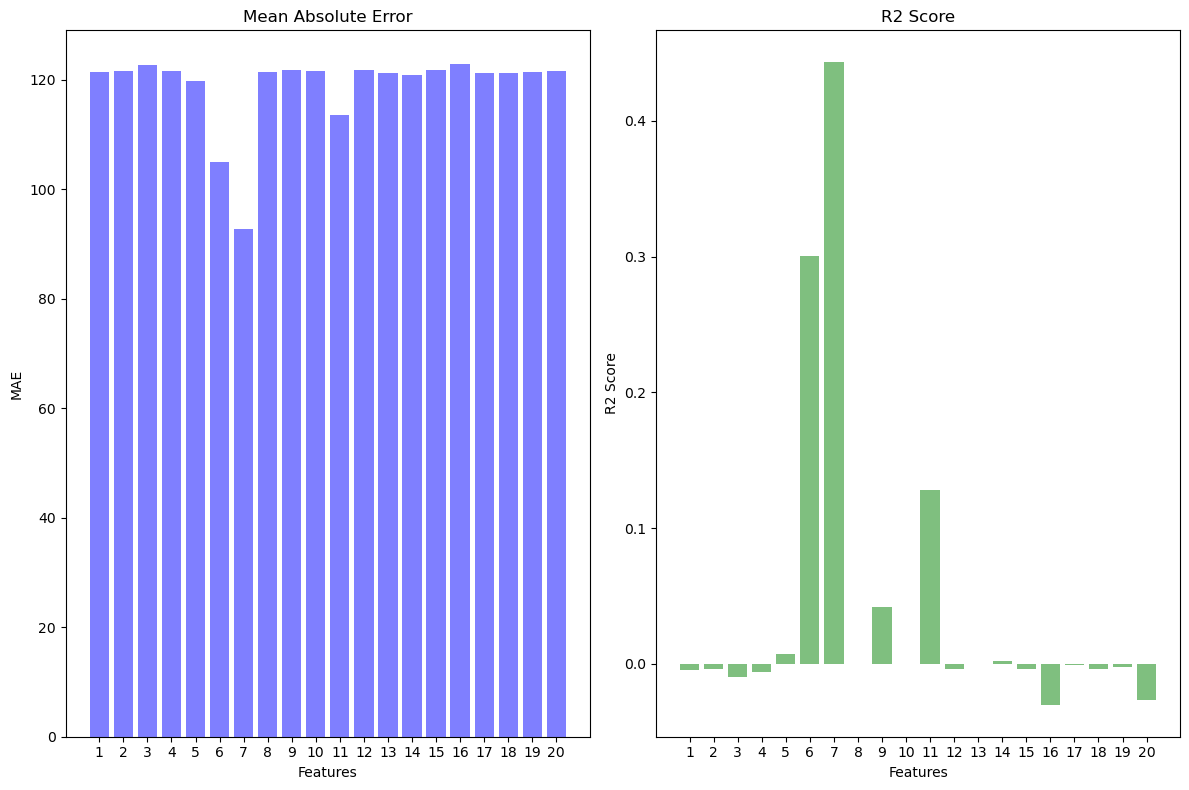

In [ ]:
# Plot the MAE and R2 scores for each feature
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].bar(range(x_train.shape[1]), mae_scores, color="blue", alpha=0.5)
ax[0].set_xticks(range(x_train.shape[1]))  # Keep the same tick positions
ax[0].set_xticklabels([str(i + 1) for i in range(x_train.shape[1])])  # Set labels from 1 to 20
ax[0].set_title("Mean Absolute Error")
ax[0].set_xlabel("Features")
ax[0].set_ylabel("MAE")
ax[1].bar(range(x_train.shape[1]), r2_scores, color="green", alpha=0.5)
ax[1].set_xticks(range(x_train.shape[1]))
ax[1].set_xticklabels([str(i + 1) for i in range(x_train.shape[1])])
ax[1].set_title("R2 Score")
ax[1].set_xlabel("Features")
ax[1].set_ylabel("R2 Score")
plt.tight_layout()
plt.show()


Analizamos mean_absolute_error (MAE) y R2 score de cada feature.

- Los valores MAE más bajos indican un mejor rendimiento predictivo. Las características (Features) con valores MAE más bajos son más informativas, ya que tienen una menor desviación entre los valores predichos y los reales. Al observar el grafico, como features de 6, 7 y 11 presentan los valores MAE más bajos, por lo que son las más informativas en este sentido.

- Los valores R2 score más altos (más cercanos a 1) indican un mejor poder explicativo. Las características (Features) con R2 score más altos contribuyen más a explicar la varianza de la variable objetivo.  Al observar el grafico, como features de 6, 7 y 11 también presentan los valores R2 score más altos, lo que las convierte en las más informativas en cuanto a poder explicativo.

---

### Ridge Regression

Ridge Regression is a regularized linear model, with a hyper-parameter that allows to control its complexity.

<div class="qst">

* Train a Ridge Regression model over the training partition, adjusting its regularization hyper-parameter `alpha` using a grid search with cross-validation and the default configuration; the grid is defined by the array `alpha_vec`.
* Predict over the test partition with the tuned model, and compute the MAE and the $R^2$ scores.

</div>

In [ ]:
alpha_vec = np.logspace(-6, 6)

################################################################################
# Insert code.
# Train a Ridge regression model over the training partition.
ridge = Ridge()
# Adjust hyperparameters alpha by using GridSearchCV with cross-validation and the default configuration.
ridge_cv = GridSearchCV(ridge, {"alpha": alpha_vec}, cv=5)
ridge_cv.fit(x_train, y_train)
print(f"Best Alpha Parameters : {ridge_cv.best_params_['alpha']:.4f}")
print(f"Best Score : {ridge_cv.best_score_:.4f}")
best_model = ridge_cv.best_estimator_
print(f"Best Estimator : {best_model}")


# Predict over the testing partition with the tuned model.
y_pred = ridge_cv.predict(x_test)


# Compute the MAE and R2 score.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"R2 Score : {r2:.4f}")
print(f"Performance : {ridge_cv.score(x_test, y_test):.4f}")

################################################################################

Best Alpha Parameters : 0.7543
Best Score : 0.8911
Best Estimator : Ridge(alpha=0.7543120063354607)
MAE : 40.1525
R2 Score : 0.8913
Performance : 0.8913


---

Whenever a grid search is used, it is important to check if the optimal hyper-parameters are located at the extreme of their respective intervals.
If so, it is convenient to expand the search region to guarantee that there are not better options.

<div class="qst">

* Plot the average validation score (the mean over the folds of the cross-validation) with respect to the regularization hyper-parameter.
* Mark in the plot the optimal value of `alpha`.
  Is it located at the extreme of the region?

<div class="notes">

* Once trained, a `GridSearchCV` model contains a dictionary called `cv_results_` with the results of the cross-validation.
  In particular, the key `"mean_test_score"` gives access to the validation score for each explored configuration.
* The optimal hyper-parameters are accessible through the dictionary `best_params_`.

</div>
</div>

Best Alpha: 0.7543, Best Validation Score:  0.8911



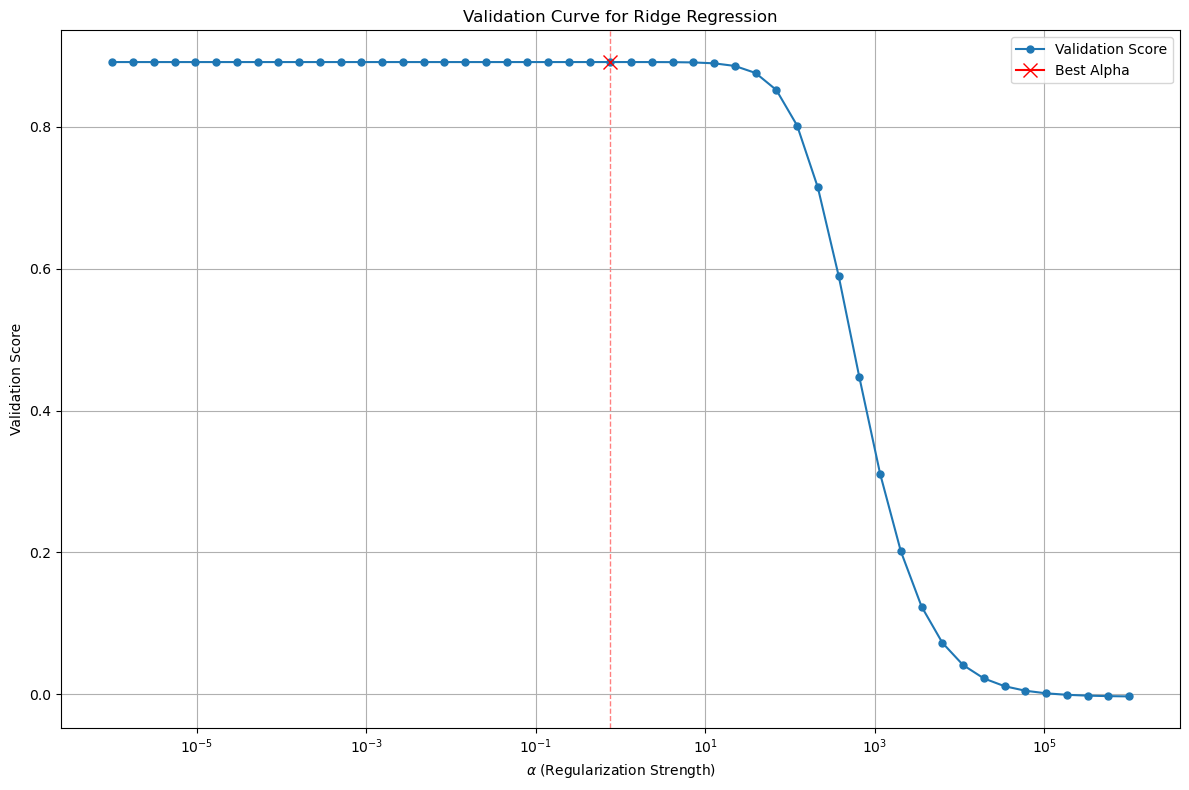

In [ ]:
################################################################################
# Insert code.
# Plot the average cross-validation score (the mean over the folds of the cross-validated scores) according to the regularization hyperparameter.
print(f"Best Alpha: {ridge_cv.best_params_['alpha']:.4f}, Best Validation Score: {ridge_cv.best_score_: .4f}")
print()

plt.figure(figsize=(12, 8))
# Mark in the plot the optimal value of alpha.
# Plot for testing and training partitions.
plt.semilogx(alpha_vec, ridge_cv.cv_results_["mean_test_score"], marker="o", markersize=5, label = "Validation Score")
plt.semilogx(ridge_cv.best_params_["alpha"], ridge_cv.best_score_, marker="x", markersize=10, color="red", label = "Best Alpha")
plt.axvline(ridge_cv.best_params_["alpha"], color="red", linestyle="--", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Validation Score")
plt.title("Validation Curve for Ridge Regression")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

################################################################################

**El valor óptimo de alpha no está situado en el extremo de la región. El valor óptimo es 0.7543 y el mejor valor de validación correspondiente al valor alpha óptimo es 0.8911, que se encuentran situados en el medio.**

En el código siguiente, realizamos una iteración a través de todos los valores de alfa. Para cada valor, entrenamos un modelo Ridge independiente y calculamos la puntuación de validación utilizando mean_absolute_error (MAE).

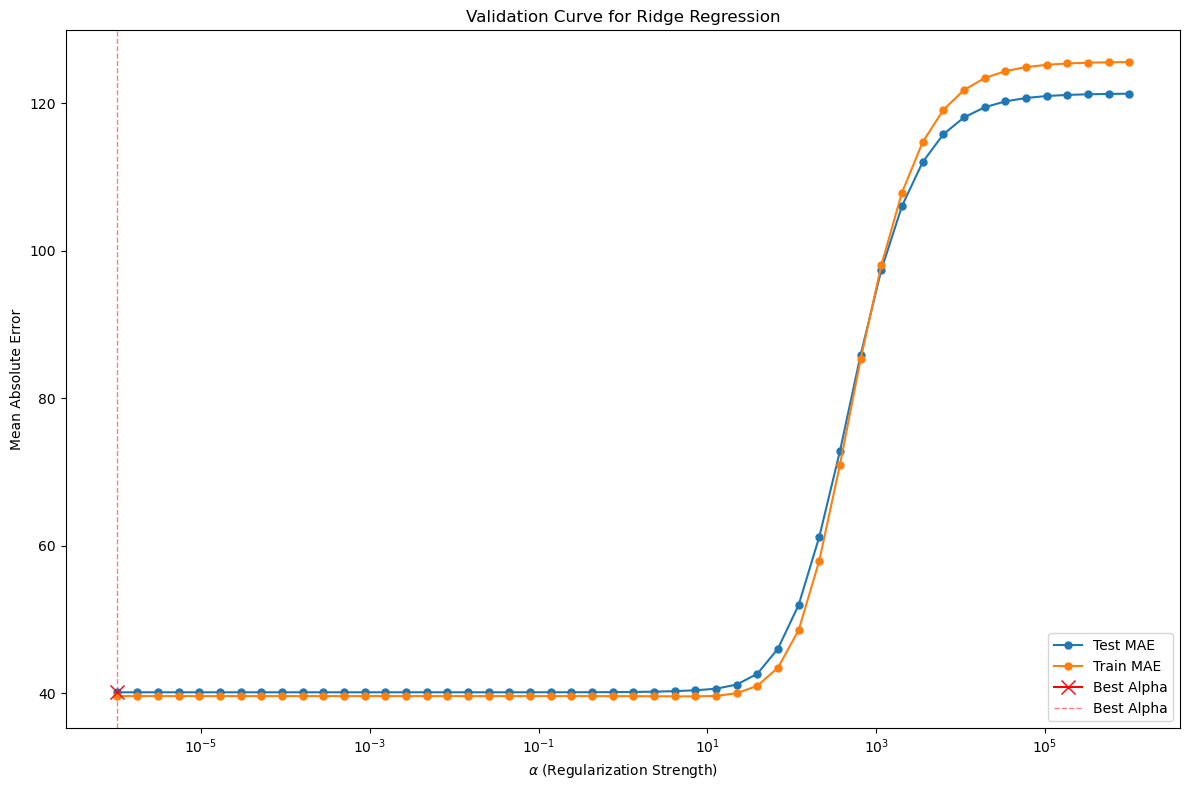

In [ ]:
mae_tr = np.zeros(len(alpha_vec))
mae_te = np.zeros(len(alpha_vec))
coefs = np.zeros((len(alpha_vec), x_train.shape[1]))
for i, alpha in enumerate(alpha_vec):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mae_te[i] = mean_absolute_error(y_test, y_pred)
    y_pred2 = ridge.predict(x_train)
    mae_tr[i] = mean_absolute_error(y_train, y_pred2)
    coefs[i] = ridge.coef_

# Plot the mean cross-validation score (the mean over the folds of the cross-validated scores) according to the regularization hyperparameter.
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_vec, mae_te, marker="o", markersize=5, label="Test MAE")
plt.semilogx(alpha_vec, mae_tr, marker="o", markersize=5, label="Train MAE")

i_alpha_optim = np.argmin(mae_te)
plt.semilogx(alpha_vec[i_alpha_optim], mae_te[i_alpha_optim], marker="x", markersize=10, color="red", label="Best Alpha")
plt.axvline(alpha_vec[i_alpha_optim], color="red", linestyle="--", label="Best Alpha", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Mean Absolute Error")
plt.title("Validation Curve for Ridge Regression")
plt.legend()
plt.tight_layout()
plt.show()


En el gráfico siguiente podemos observar que, a medida que aumenta el valor de alfa (lo que implica una regularización más fuerte), los coeficientes se reducen en general hacia cero. Esto indica un menor impacto de las features en las predicciones.

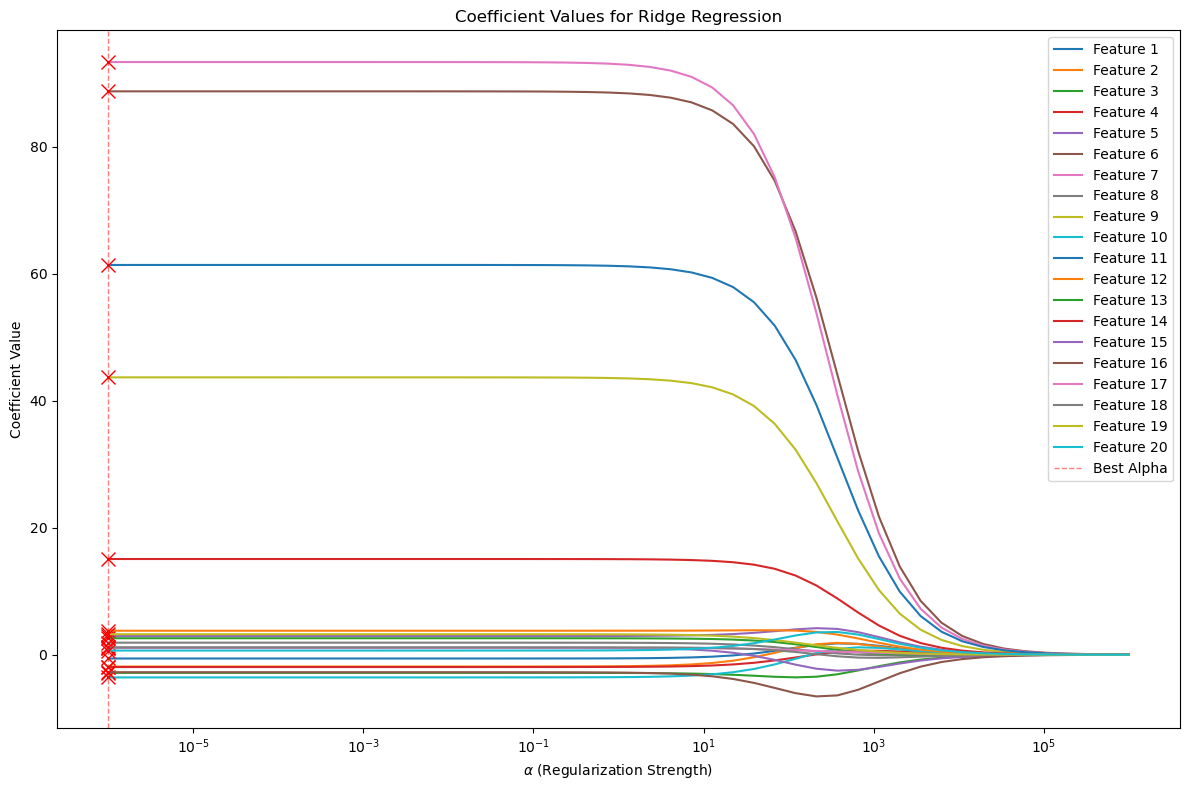

In [ ]:
# Plot the coefficients of the features according to the regularization hyperparameter.
plt.figure(figsize=(12, 8))
for i in range(x_train.shape[1]):
    plt.semilogx(alpha_vec, coefs[:, i], label=f"Feature {i+1}")
    plt.semilogx(alpha_vec[i_alpha_optim], coefs[i_alpha_optim, i], marker="x", markersize=10, color="red")
plt.axvline(alpha_vec[i_alpha_optim], color="red", linestyle="--", label="Best Alpha", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Ridge Regression")
plt.legend()
plt.tight_layout()
plt.show()

---

Since some of the features are uninformative (because the problem has been built in this way), it is interesting to see if the model has been able to detect this structure.

<div class="qst">

* Obtain a list of the features whose corresponding coefficient is different from zero.
  Is the model giving any clear information about the relevance of the features?

</div>

In [ ]:
################################################################################
# Insert code.
# Obtain list of the features whose corresponding coefficient is different from zero.
non_zero_features = np.where(coefs[i_alpha_optim] != 0)[0]
print(f"Features with non-zero coefficients for the optimal alpha: {non_zero_features + 1}")

# Sort features by absolute coefficient values (descending order)
sorted_features = np.argsort(np.abs(coefs[i_alpha_optim]))[::-1]

# Print features with top-k absolute coefficients
top_k = 5  # Adjust k as needed
for i in range(top_k):
  idx = sorted_features[i]
  print(f"Feature {idx + 1} (Coefficient: {coefs[i_alpha_optim][idx]:.4f})")


################################################################################

Features with non-zero coefficients for the optimal alpha: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Feature 7 (Coefficient: 93.3191)
Feature 6 (Coefficient: 88.7077)
Feature 11 (Coefficient: 61.3749)
Feature 9 (Coefficient: 43.6763)
Feature 14 (Coefficient: 15.0737)


Que un coeficiente sea distinto de cero no indica necesariamente una gran relevancia. Sin embargo, al observar los coeficientes de las features, la magnitud (valor absoluto) del coeficiente puede ser más informativa. Los valores absolutos mayores sugieren una mayor influencia de la característica en la variable target. En este caso, como los valores absolutos de las features 6, 7, 9, 11 y 14 son mayores, estas features nos dan información más clara sobre su relevancia.

---

### Lasso

Lasso is an alternative to Ridge Regression, but with a sparsity-inducing regularizer.

<div class="qst">

* Train a Lasso model over the training partition, adjusting its regularization hyper-parameter `alpha` using a grid search with cross-validation and the default configuration; the grid is defined by the array `alpha_vec`.
* Predict over the test partition with the tuned model, and compute the MAE and the $R^2$ scores.

</div>

In [ ]:
alpha_vec = np.logspace(-6, 6)

################################################################################
# Insert code.
# Train a Lasso regression model over the training partition.
lasso = Lasso()
# Adjust hyperparameters alpha by using GridSearchCV with cross-validation and the default configuration.
lasso_cv = GridSearchCV(lasso, {"alpha": alpha_vec}, cv=5)
lasso_cv.fit(x_train, y_train)
print(f"Best Alpha Parameters : {lasso_cv.best_params_['alpha']:.4f}")
print(f"Best Score : {lasso_cv.best_score_:.4f}")
best_model = lasso_cv.best_estimator_
print(f"Best Estimator : {best_model}")

# Predict over the testing partition with the tuned model.
y_pred = lasso_cv.predict(x_test)

# Compute the MAE and R2 score.
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"R2 Score : {r2:.4f}")
print(f"Performance : {lasso_cv.score(x_test, y_test):.4f}")

################################################################################

Best Alpha Parameters : 2.3300
Best Score : 0.8952
Best Estimator : Lasso(alpha=2.329951810515372)
MAE : 38.8072
R2 Score : 0.8967
Performance : 0.8967


---

As before, the results of the grid search should be analysed.

<div class="qst">

* Plot the average validation score (the mean over the folds of the cross-validation) with respect to the regularization hyper-parameter.
* Mark in the plot the optimal value of `alpha`.
  Is it located at the extreme of the region?

</div>

Best Alpha: 2.3300, Best Validation Score:  0.8952



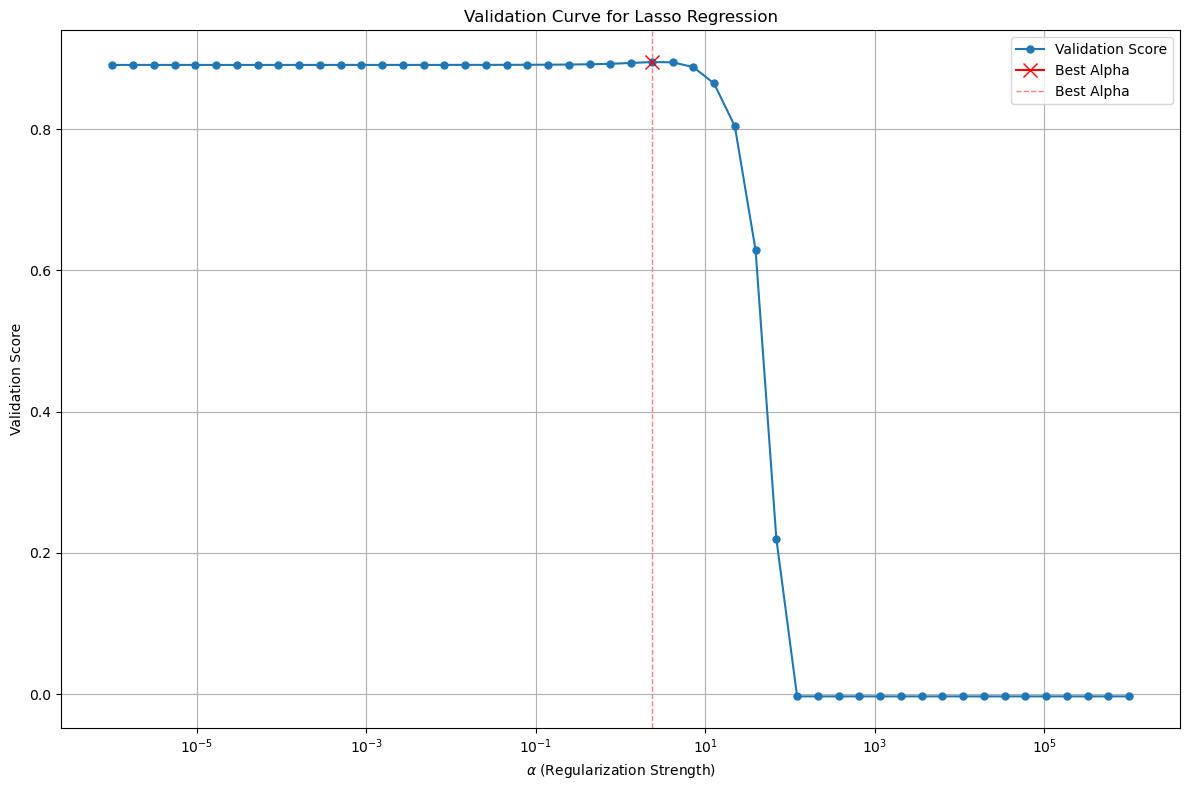

In [ ]:
################################################################################
# Insert code.
# Plot the average cross-validation score (the mean over the folds of the cross-validated scores) according to the regularization hyperparameter.
print(f"Best Alpha: {lasso_cv.best_params_['alpha']:.4f}, Best Validation Score: {lasso_cv.best_score_: .4f}")
print()

plt.figure(figsize=(12, 8))
# Mark in the plot the optimal value of alpha.
# Plot for testing and training partitions.
plt.semilogx(alpha_vec, lasso_cv.cv_results_["mean_test_score"], marker="o", markersize=5, label = "Validation Score")
plt.semilogx(lasso_cv.best_params_["alpha"], lasso_cv.best_score_, marker="x", markersize=10, color="red", label = "Best Alpha")
plt.axvline(lasso_cv.best_params_["alpha"], color="red", linestyle="--", label = "Best Alpha", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Validation Score")
plt.title("Validation Curve for Lasso Regression")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


################################################################################

**El valor óptimo de alpha no está situado en el extremo de la región. El valor óptimo es 2.33 y el mejor valor de validación correspondiente al valor alpha óptimo es 0.8952, que se encuentran situados en el medio.**

En el código siguiente, realizamos una iteración a través de todos los valores de alpha. Para cada valor, entrenamos un modelo Losso independiente y calculamos la puntuación de validación utilizando mean_absolute_error (MAE).

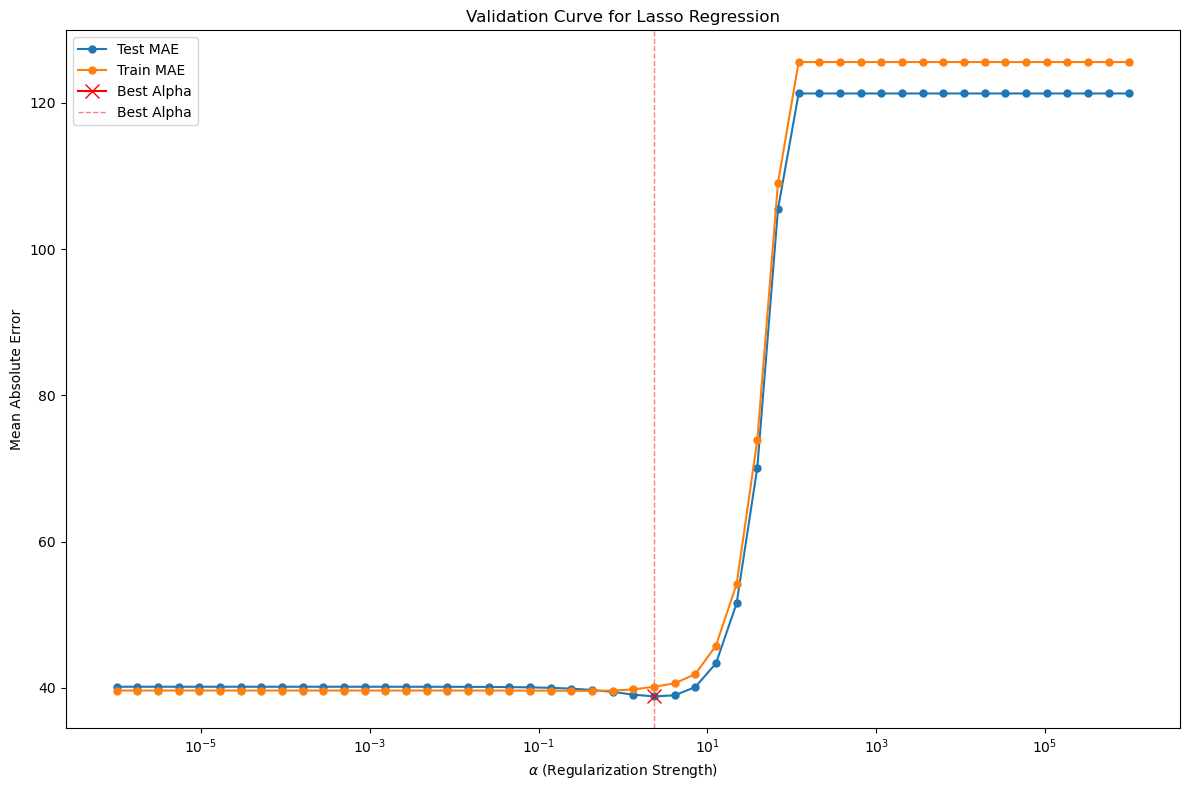

In [ ]:
mae_tr = np.zeros(len(alpha_vec))
mae_te = np.zeros(len(alpha_vec))
coefs = np.zeros((len(alpha_vec), x_train.shape[1]))
for i, alpha in enumerate(alpha_vec):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mae_te[i] = mean_absolute_error(y_test, y_pred)
    y_pred2 = lasso.predict(x_train)
    mae_tr[i] = mean_absolute_error(y_train, y_pred2)
    coefs[i] = lasso.coef_

# Plot the mean cross-validation score (the mean over the folds of the cross-validated scores) according to the regularization hyperparameter.
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_vec, mae_te, marker="o", markersize=5, label="Test MAE")
plt.semilogx(alpha_vec, mae_tr, marker="o", markersize=5, label="Train MAE")

# # Identify best alpha based on a combination of validation score and sparsity (number of zero coefficients)
# best_alpha_idx = np.argmax(lasso_cv.cv_results_["mean_test_score"] * (np.sum(lasso_cv.best_estimator_.coef_ == 0, axis=1)))

i_alpha_optim = np.argmin(mae_te)
plt.semilogx(alpha_vec[i_alpha_optim], mae_te[i_alpha_optim], marker="x", markersize=10, color="red", label="Best Alpha")
plt.axvline(alpha_vec[i_alpha_optim], color="red", linestyle="--", label="Best Alpha", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Mean Absolute Error")
plt.title("Validation Curve for Lasso Regression")
plt.legend()
plt.tight_layout()
plt.show()

En el gráfico siguiente podemos observar que, a medida que aumenta el valor de alfa (lo que implica una regularización más fuerte), los coeficientes se reducen en general hacia cero. Esto indica un menor impacto de las features en las predicciones.

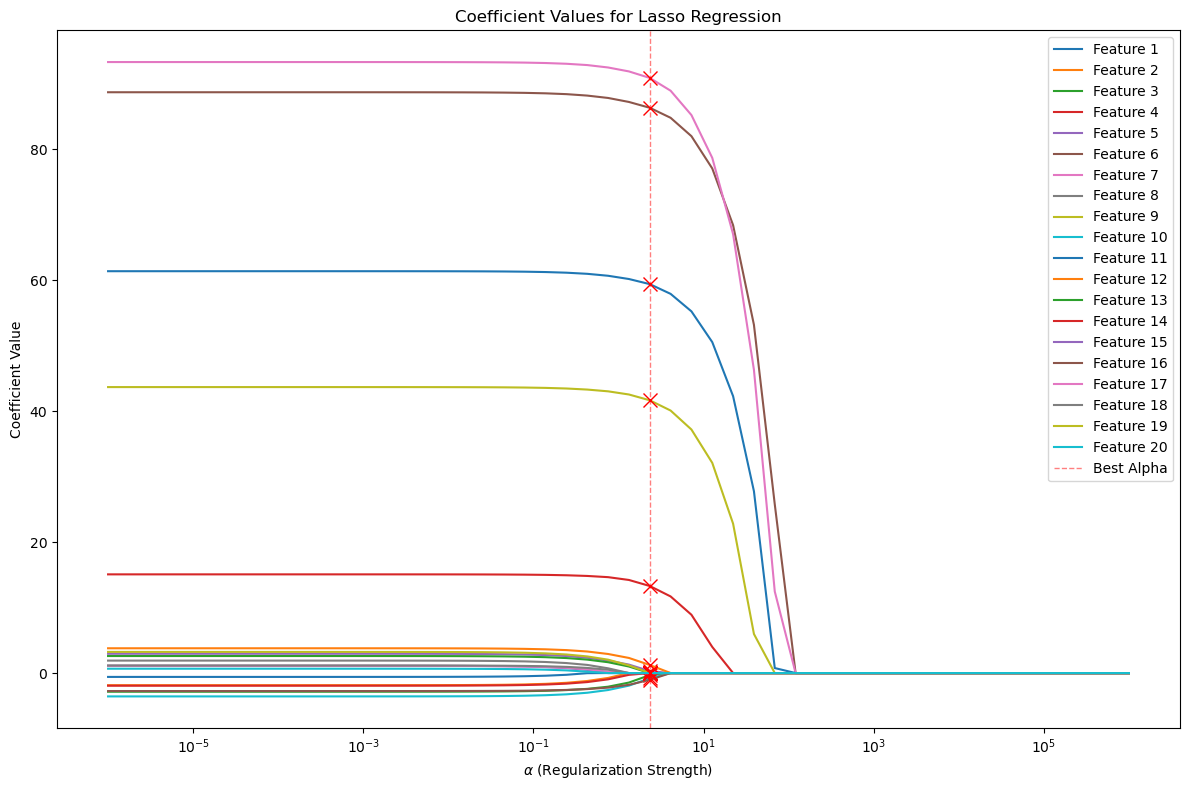

In [ ]:
# Plot the coefficients of the features according to the regularization hyperparameter.
plt.figure(figsize=(12, 8))
for i in range(x_train.shape[1]):
    plt.semilogx(alpha_vec, coefs[:, i], label=f"Feature {i+1}")
    plt.semilogx(alpha_vec[i_alpha_optim], coefs[i_alpha_optim, i], marker="x", markersize=10, color="red")
plt.axvline(alpha_vec[i_alpha_optim], color="red", linestyle="--", label="Best Alpha", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("$\\alpha$ (Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Lasso Regression")
plt.legend()
plt.tight_layout()
plt.show()


---

The coefficients should also be analysed.

<div class="qst">

* Obtain a list of the features whose corresponding coefficient is different from zero.
  Is the model giving any clear information about the relevance of the features?

</div>

In [ ]:
################################################################################
# Insert code.
# Obtain list of the features whose corresponding coefficient is different from zero.
non_zero_features = np.where(coefs[i_alpha_optim] != 0)[0]
print(f"Features with non-zero coefficients for the optimal alpha: {non_zero_features + 1}")

# Sort features by absolute coefficient values (descending order)
sorted_features = np.argsort(np.abs(coefs[i_alpha_optim]))[::-1]

# Print features with top-k absolute coefficients
top_k = 5  # Adjust k as needed
for i in range(top_k):
  idx = sorted_features[i]
  print(f"Feature {idx + 1} (Coefficient: {coefs[i_alpha_optim][idx]:.4f})")

################################################################################

Features with non-zero coefficients for the optimal alpha: [ 3  5  6  7  9 10 11 12 14 16]
Feature 7 (Coefficient: 90.8937)
Feature 6 (Coefficient: 86.3345)
Feature 11 (Coefficient: 59.4013)
Feature 9 (Coefficient: 41.6602)
Feature 14 (Coefficient: 13.2962)


Si bien un coeficiente distinto de cero no implica gran relevancia, la magnitud del coeficiente (valor absoluto) sí es informativa. Los valores absolutos mayores indican una mayor influencia de la feature en la variable target. En este caso, las features 6, 7, 9, 11 y 14, con valores absolutos mayores, son las más relevantes.

---

## Classification Case Study

### Dataset

A synthetic binary classification dataset is considered here.

In [ ]:
x, y = make_classification(n_samples=500, random_state=seed)

<div class="qst">

* Divide the dataset into a training ($70\%$) and a test ($30\%$) partitions, using the method `train_test_split`.

</div>

In [ ]:
################################################################################
# Insert code.
# Divide the dataset into training (70%) and testing (30%) sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
print(f"Training set x : {x_train.shape[0]} samples")
print(f"Testing set x  : {x_test.shape[0]} samples")
print(f"Traning set y  : {y_train.shape[0]} samples")
print(f"Testing set y  : {y_test.shape[0]} samples")
print
print(f"x_train :")
print(x_train[:5])
print()
print(f"y_train :")
print(y_train[:5])

################################################################################

Training set x : 350 samples
Testing set x  : 150 samples
Traning set y  : 350 samples
Testing set y  : 150 samples
x_train :
[[ 1.29199339e+00 -1.91436755e+00  2.09415952e-01  6.40903634e-02
  -7.49725840e-01 -1.05274917e+00 -9.64365775e-01  1.52685207e+00
  -3.83255842e-01 -6.86079760e-01 -1.14012880e+00 -1.15963745e+00
   5.60595331e-01  2.43722989e+00 -1.53765151e+00  8.14700356e-01
  -6.33327564e-01  8.69776986e-01 -2.99335758e-01 -1.21358088e+00]
 [-6.38908438e-01  1.01926969e+00  2.12507605e+00 -5.16760194e-02
   7.83419163e-01  1.28221218e+00  9.30375878e-03  5.26821688e-01
   2.43842248e+00  1.95110715e+00  1.30760121e+00  6.86426198e-01
  -2.76855758e-01  1.12170827e-01 -1.49228693e+00  7.92024341e-01
  -7.39750689e-01 -9.82076237e-01  3.18049855e-01  1.04950049e-01]
 [ 2.61804770e-01 -1.19627010e+00  3.33849714e-01 -7.36978043e-01
  -1.32509489e+00  4.76310329e-01 -6.88768874e-02  4.29963479e-01
  -1.08301634e-03 -8.41104531e-01 -9.45797318e-01  9.12550657e-01
  -4.48672337e

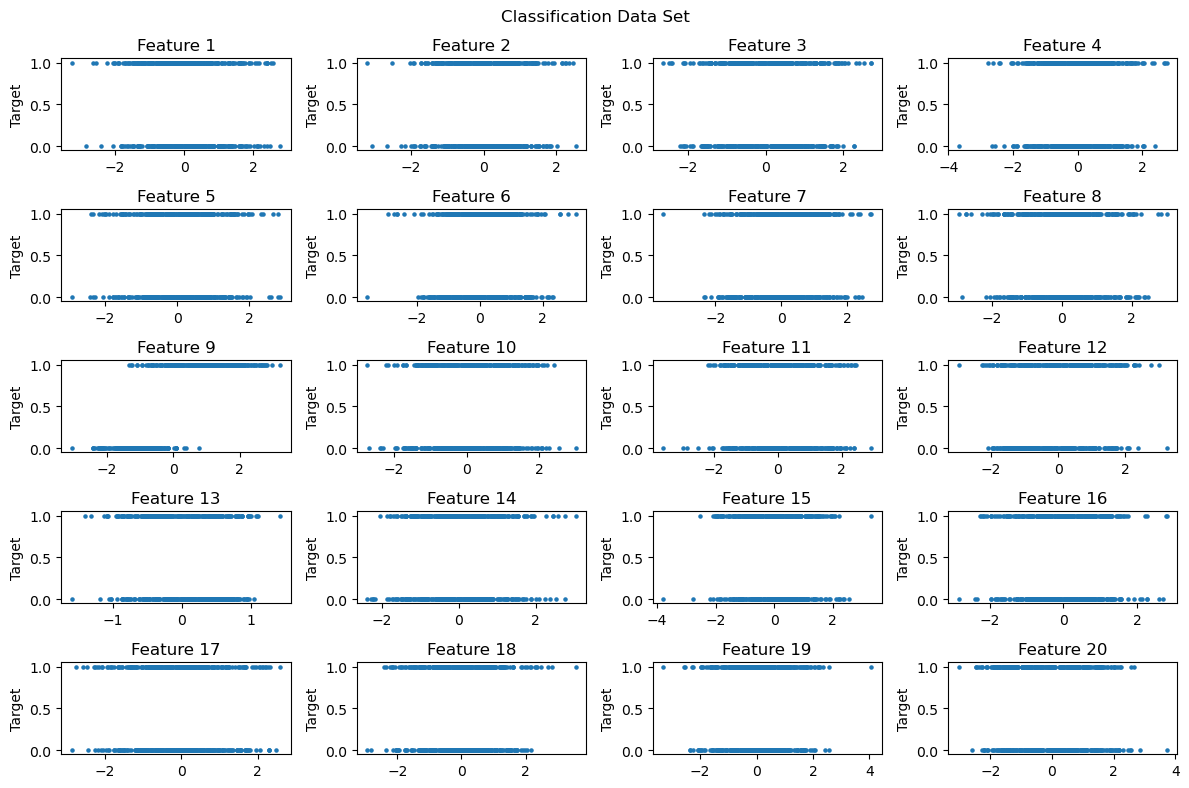

In [ ]:
# Create the scatter plot
fig, ax = plt.subplots(5, 4, figsize=(12, 8))
for i in range(5):
    for j in range(4):
        ax[i, j].scatter(x[:, 4 * i + j], y, s=5)
        ax[i, j].set_title(f"Feature {4 * i + j + 1}")
        ax[i, j].set_ylabel("Target")
# Set labels and title.
fig.suptitle("Classification Data Set")
plt.tight_layout()
plt.show()



---

### Analysis

As a preliminary analysis of the data, the correlation between each feature and the target can give some information about how (linearly) informative that feature is.

<div class="qst">

* Compute the correlation between each feature and the target, considering only the training partition.
* Represent the correlation of each feature using a bar plot.
  According to the plot, which ones seem to be more informative?

</div>

Calculamos la correlación entre cada característica (feature) y la variable objetivo (target), considerando solo la partición de entrenamiento.

In [ ]:
################################################################################
# Insert code.
# Compute the correlation between the features and the target in the training set with corrcoef.
correlation = np.corrcoef(x_train, y_train, rowvar=False)
print("The correlation between the features and the target for x_train and y_train :")
print(correlation)
print()

# The last row of the correlation matrix contains the correlations with the target
feature_target_corr = correlation[:-1, -1]
print("The last row of the correlation between the features and the target for x_train and y_train :")
print(feature_target_corr)

# Display the correlations (sorted in descending order)
print("Feature-Target Correlations:")
for i, corr in enumerate(feature_target_corr):
    print(f"Feature {i+1}: {corr:.4f}")


################################################################################

The correlation between the features and the target for x_train and y_train :
[[ 1.00000000e+00  7.65755796e-03 -4.32630807e-02 -2.51289502e-02
   6.06886439e-02 -3.85776301e-02 -1.38693679e-01  3.46651307e-02
  -9.92182402e-02 -7.07054446e-02 -2.89643496e-02  1.09241240e-02
  -1.71549250e-02  2.68943278e-02  7.05423086e-02  1.82479671e-02
   1.97637539e-02  4.17383196e-03  5.13568952e-02  4.18143602e-02
  -5.46817943e-02]
 [ 7.65755796e-03  1.00000000e+00  2.94541970e-02  1.52611513e-02
   1.70974991e-02 -1.11511367e-02 -3.31516970e-02  3.72635047e-02
   9.05481688e-02  2.57653629e-02  3.54180863e-02 -9.16220651e-03
   1.48333436e-02  1.64949234e-02  7.50494932e-02  1.14578750e-01
  -4.90317039e-03 -9.36458363e-02  3.01526399e-02 -3.73042189e-02
   5.65717594e-02]
 [-4.32630807e-02  2.94541970e-02  1.00000000e+00 -1.62995786e-02
   5.08775528e-02  6.95346486e-02  6.39152822e-02 -2.55777555e-02
  -3.96019339e-03  7.57041321e-02  1.24235967e-03 -3.85311073e-02
   3.90157072e-02  1.03468

Luego, representamos la correlación de cada característica mediante un diagrama de barras.

Al observar el gráfico, podemos ver que cuanto más se acerquen los valores a 1, mayor será la correlación.

En este caso, las features 9 y 12 son las más informativas. Esto se debe a que presentan correlaciones con la variable target de 0.77 y 0.16, respectivamente, que son valores más altos que las demás features.

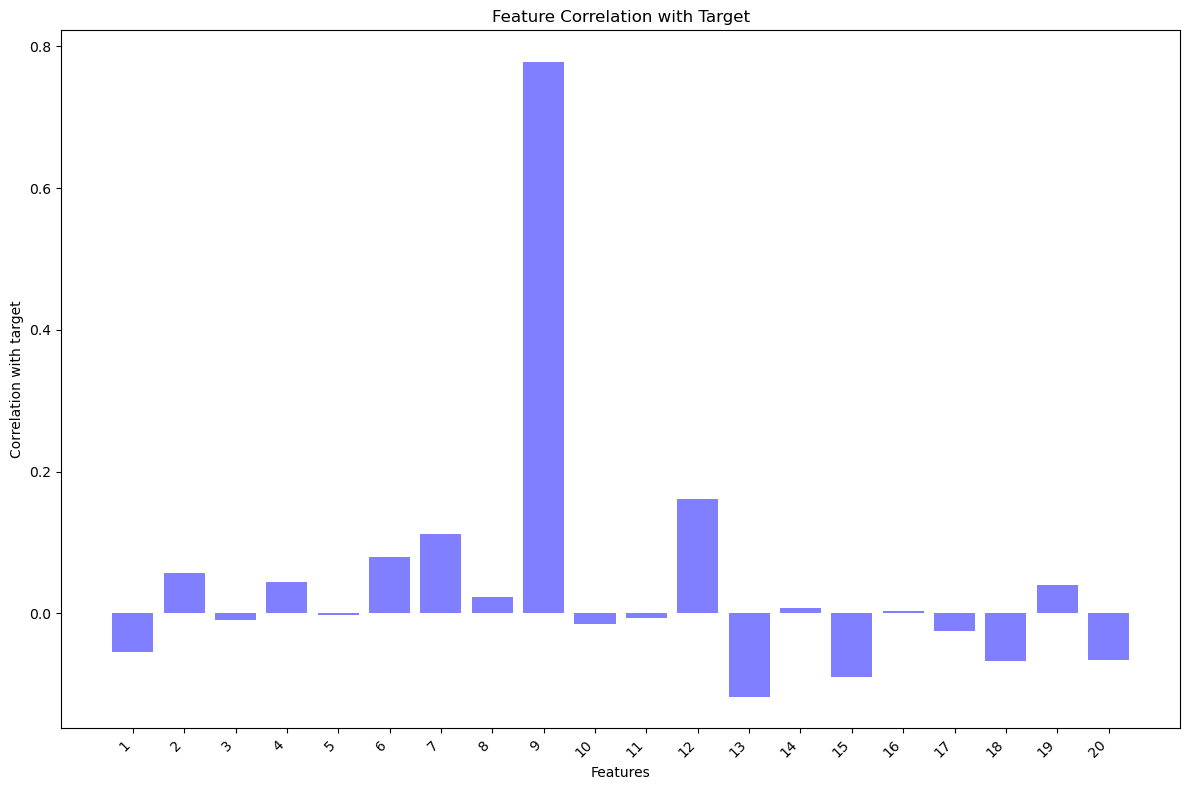

In [ ]:
# Use bar plot to display the correlations of each feature with the target
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the bar chart on the created axis (ax)
ax.bar(range(len(feature_target_corr)), feature_target_corr, color='blue', alpha=0.5)

# Set axis attributes directly using ax
ax.set_xticks(range(len(feature_target_corr)))
ax.set_xticklabels([str(i + 1) for i in range(x_train.shape[1])])
ax.set_title('Feature Correlation with Target')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation with target')

# Adjust layout and display the plot
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

---

### Logistic Regression

The equivalent to a linear regression model in classification is the Logistic Regression model.

<div class="qst">

* Train a 1-dimensional unregularized Logistic Regression model for each feature using the training partition.
  In particular, set the regularization hyper-parameter as `C=1e-6`.
* Predict over the test partition with each model, and compute the accuracy.
  According to the result, which features seem to be more informative?

<div class="notes">

* The default *scikit-learn* metric for classification is the accuracy, so the method `score` of a classifier can be used to check the performance over new data.

</div>
</div>

In [ ]:
################################################################################
# Insert code.
# Initialize lists to store results for each feature
# List to store trained models
models = []

# Loop through each feature in the training data
for feature_idx in range(x_train.shape[1]):
  # Select the current feature column
  X_train_single = x_train[:, feature_idx].reshape(-1, 1)

  # Create and train a Logistic Regression model with C=1e-6 (unregularized)
  model = LogisticRegression(C=1e-6, fit_intercept=True, solver='liblinear')
  model.fit(X_train_single, y_train)

  # Append the trained model to the list
  models.append(model)

# List to store test set predictions for each model
predictions = []

# Loop through each model and predict on the test set
for model in models:
  # Predict using the model and store in a list
  predictions.append(model.predict(x_test[:, feature_idx].reshape(-1, 1)))

# Calculate accuracy for each model on the test set
accuracies = []
for i, prediction in enumerate(predictions):
  accuracy = accuracy_score(y_test, prediction)
  accuracies.append(accuracy)
  print(f"Feature {i+1} Accuracy: {accuracy:.4f}")

# Print the highest accuracy and its corresponding feature
max_accuracy_idx = np.argmax(accuracies)
print(f"Highest Accuracy Feature: {max_accuracy_idx + 1}, Accuracy: {accuracies[max_accuracy_idx]:.4f}")


################################################################################

Feature 1 Accuracy: 0.4867
Feature 2 Accuracy: 0.5267
Feature 3 Accuracy: 0.5133
Feature 4 Accuracy: 0.5067
Feature 5 Accuracy: 0.4800
Feature 6 Accuracy: 0.5200
Feature 7 Accuracy: 0.5267
Feature 8 Accuracy: 0.5067
Feature 9 Accuracy: 0.5333
Feature 10 Accuracy: 0.5067
Feature 11 Accuracy: 0.4867
Feature 12 Accuracy: 0.5267
Feature 13 Accuracy: 0.4867
Feature 14 Accuracy: 0.4667
Feature 15 Accuracy: 0.4800
Feature 16 Accuracy: 0.4800
Feature 17 Accuracy: 0.5067
Feature 18 Accuracy: 0.4800
Feature 19 Accuracy: 0.5133
Feature 20 Accuracy: 0.4800
Highest Accuracy Feature: 9, Accuracy: 0.5333


Las características (Features) con modelos que logran una mayor precisión (accuracy) en test set pueden ser más informativas para predecir la variable target en este modelo específico (Logistic Regression). Potencialmente podrían tener una relación más fuerte con la variable target. Por esta razón, podemos decir que Feature 9 es más informativa que otras features. También podemos decir que Feature 2, 7, 12 y 19 son informativas.

---

### Regularized Logistic Regression

Logistic Regression allows to regularize the coefficients, both with the $\ell_2$ and the $\ell_1$ norms.

<div class="qst">

* Train a Logistic Regression model over the training partition, using a combined regularization (`penalty="elasticnet"`).
  Adjust its regularization hyper-parameters (`C` and `l1_ratio`) using a grid search with cross-validation and the default configuration; the grid is defined by the arrays `c_vec` and `l1_ratio_vec`.
* Predict over the test partition with the tuned model, and compute the accuracy.

<div class="notes">

* To use an Elastic–Net regularization in *scikit-learn*, the solver has to be selected as `solver="saga"`.
* To guarantee convergence of the training, the number of iterations can be increased as `max_iter=5000`.

</div>
</div>

In [ ]:
c_vec = np.logspace(-6, 6, 13)
l1_ratio_vec = np.linspace(0, 1, 11)

################################################################################
# Insert code.
# max_iter=5000, solver="saga"
# Adjust hyperparameters (C ans l1_ration) using GridSearchCV with cross-validation and the default configuration.The grid is defined bythe arrays c_vec and l1_ratio_vec.
# Train a Logistic regression model over the training partition by using regularization penalty="elesticnet".
log_reg = LogisticRegression(penalty="elasticnet", max_iter=5000, solver="saga")
# Define parameter grid
param_grid = {'C': c_vec, 'l1_ratio': l1_ratio_vec}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
log_reg_cv.fit(x_train, y_train)

# Predict over the testing partition with the tuned model.
y_pred = log_reg_cv.predict(x_test)

# Compute the accuracy score.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f"Performance : {log_reg_cv.score(x_test, y_test):.4f}")

# Get best hyperparameters
best_c = log_reg_cv.best_params_['C']
best_l1_ratio = log_reg_cv.best_params_['l1_ratio']

print(f"Best Regularization Parameters : {log_reg_cv.best_params_}")
print(f"Best C Parameter : {best_c:.4f}")
print(f"Best l1_ratio Parameter : {best_l1_ratio:.4f}")
print(f"Best Score : {log_reg_cv.best_score_:.4f}")
best_model = log_reg_cv.best_estimator_
print(f"Best Estimator : {best_model}")
print()

# Train the final model with best hyperparameters
final_model = LogisticRegression(solver='saga', penalty='elasticnet', C=best_c, l1_ratio=best_l1_ratio, max_iter=5000)
final_model.fit(x_train, y_train)

# Predict on test data
y_pred_final = final_model.predict(x_test)

# Compute accuracy
accuracy_final = np.mean(y_pred_final == y_test)
print(f"Final Model Accuracy: {accuracy_final:.4f}")

################################################################################

Accuracy : 0.9133
Performance : 0.9133
Best Regularization Parameters : {'C': 0.1, 'l1_ratio': 0.9}
Best C Parameter : 0.1000
Best l1_ratio Parameter : 0.9000
Best Score : 0.9057
Best Estimator : LogisticRegression(C=0.1, l1_ratio=0.9, max_iter=5000, penalty='elasticnet',
                   solver='saga')

Final Model Accuracy: 0.9133


---

The selected hyper-parameters has to be checked.

<div class="qst">

* Obtain the optimal hyper-parameters for the Logistic Regression model.
  Are they located at the extreme of the regions?

</div>

In [ ]:
################################################################################
# Insert code.
# Obtain the optimal hyperparameters for the logistic regression model.
best_c = log_reg_cv.best_params_['C']
best_l1_ratio = log_reg_cv.best_params_['l1_ratio']
print(f"Best Regularization Parameters : {log_reg_cv.best_params_}")
print(f"Best C Parameter : {best_c:.4f}")
print(f"Best l1_ratio Parameter : {best_l1_ratio:.4f}")
print(f"Best Score : {log_reg_cv.best_score_:.4f}")
best_model = log_reg_cv.best_estimator_
print()
print(f"Best Estimator : {best_model}")
print()
best_coef = best_model.coef_
print("Best Estimator Coefficients:" , best_coef)
# print("Best Estimator Coefficients:\n{}".format(best_coef. round(4)))
print("Best Estimator Coefficients:", best_coef.round(4))

################################################################################

Best Regularization Parameters : {'C': 0.1, 'l1_ratio': 0.9}
Best C Parameter : 0.1000
Best l1_ratio Parameter : 0.9000
Best Score : 0.9057

Best Estimator : LogisticRegression(C=0.1, l1_ratio=0.9, max_iter=5000, penalty='elasticnet',
                   solver='saga')

Best Estimator Coefficients: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00078595e-04
  0.00000000e+00 1.28156407e-02 0.00000000e+00 0.00000000e+00
  2.34397262e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Best Estimator Coefficients: [[0.000e+00 0.000e+00 0.000e+00 1.000e-04 0.000e+00 1.280e-02 0.000e+00
  0.000e+00 2.344e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]


En el gráfico siguiente, GridSearchCV determina la mejor combinación de C (regularización) y l1_ratio (mezcla ElasticNet) para Logistic Regression. Podemos ver cómo cambia el rendimiento del modelo con diferentes C y l1_ratio. Los valores óptimos de hyperparameters no está situado en el extremo de la región, sino en un punto intermedio. Específicamente, para un valor de l1_ratio de 0.90 y C de 0.1, se obtiene la mejor Validation Score de 0.9057.

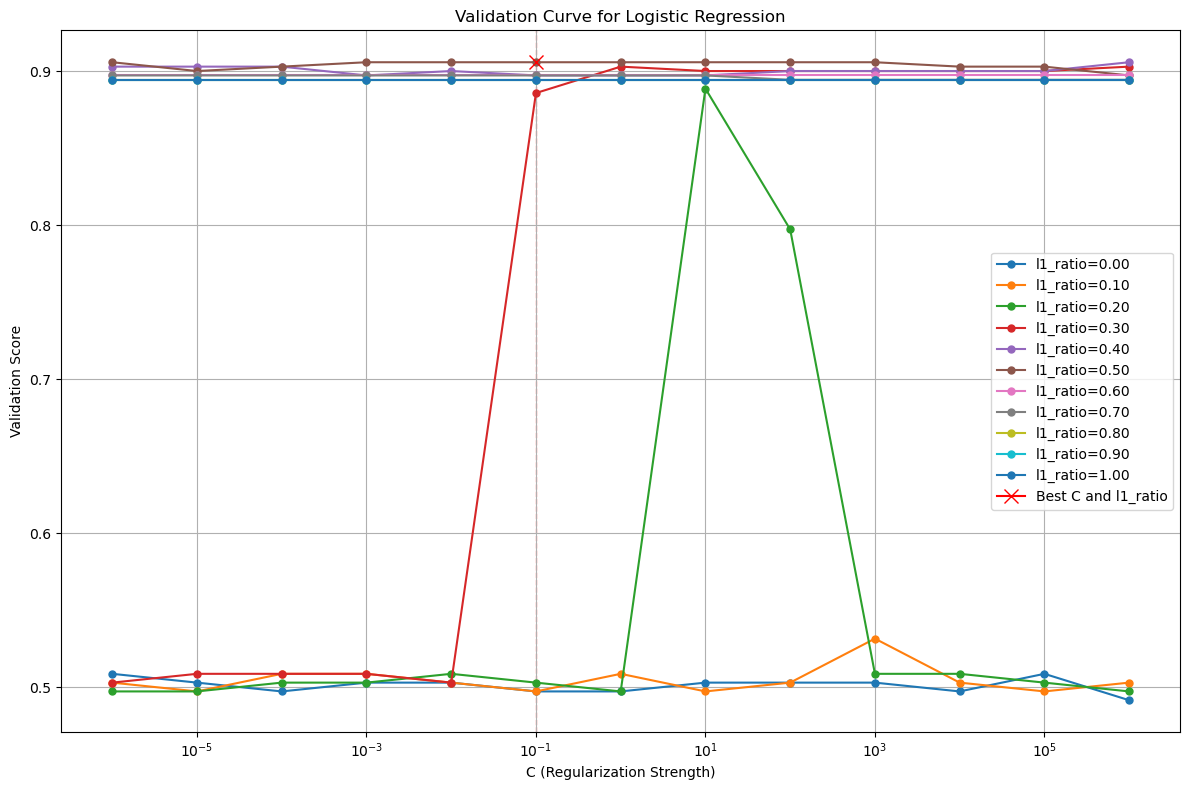

In [ ]:
# According to the optimal hyperparameters for the logistic regression model, plot the average validation score according to the regularization hyperparameter.
# Mark in the plot the optimal value of C and l1_ratio.
plt.figure(figsize=(12, 8))
# Plot for testing and training partitions.
for i, l1_ratio in enumerate(l1_ratio_vec):
    scores = log_reg_cv.cv_results_["mean_test_score"][i*len(c_vec):(i+1)*len(c_vec)]
    plt.semilogx(c_vec, scores, marker="o", markersize=5, label = f"l1_ratio={l1_ratio:.2f}")

plt.semilogx(best_c, log_reg_cv.best_score_, marker="x", markersize=10, color="red", label = "Best C and l1_ratio")
# plt.semilogx(best_c, log_reg_cv.best_score_, marker="x", markersize=10, color="red", label = "Best C")
plt.axvline(best_c, color="red", linestyle="--", alpha=0.5, lw=1, zorder=-1)
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Validation Score")
plt.title("Validation Curve for Logistic Regression")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


---

The coefficients should also be analysed.

<div class="qst">

* Obtain a list of the features whose corresponding coefficient is different from zero.
  Is the model giving any clear information about the relevance of the features?

</div>

In [ ]:
################################################################################
# Insert code.
# Obtain a list of the features whose corresponding coefficient is different from zero.
non_zero_features = np.where(best_model.coef_ != 0)[1]
print(f"Features with non-zero coefficients for the optimal alpha: {non_zero_features + 1}")  # we add 1 to those indices because indexing starts from 0.

# Sort features by absolute coefficient values (descending order)
sorted_features = np.argsort(np.abs(best_model.coef_.ravel()))[::-1]

# Print top-k features with non-zero coefficients
top_k = 5  # Adjust k as needed
for i, idx in enumerate(sorted_features[:top_k]):
  if best_model.coef_[0, idx] != 0:  # Check for non-zero value
    print(f"Feature {idx + 1} (Coefficient: {best_model.coef_[0, idx]:.4f})")



################################################################################

Features with non-zero coefficients for the optimal alpha: [4 6 9]
Feature 9 (Coefficient: 2.3440)
Feature 6 (Coefficient: 0.0128)
Feature 4 (Coefficient: 0.0001)


Un coeficiente distinto de cero no indica necesariamente una gran relevancia. Sin embargo, al observar los coeficientes de las features, la magnitud (valor absoluto) del coeficiente puede ser más informativa.

Los valores absolutos mayores sugieren una mayor influencia de la característica en la variable target. En este caso, como los valores absolutos de las features 4, 6 y 9 son mayores, estas features nos dan información más clara sobre su relevancia.

---